Actividad 3.1 - Detección de peatones

Import required libraries

In [2]:
import matplotlib.image as mpimg   # Para leer imágenes
import matplotlib.pyplot as plt    # Para graficar imágenes
import numpy as np                 # Para manejo de datos
import seaborn as sns              # Para los mapas de calor de las matrices de confusion
import cv2                         # OpenCV: para procesamiento de imágenes
from skimage.feature import hog    # Para extraer características HOG de imágenes (Histogram of Oriented Gradients)


Se define funcion Hog

In [3]:
#Se define la funcion de hog para simplemente mandarla llamar en el código en vez de re-escribirla múltiples veces
def hog_funct(img_gray):

    features, hog_img =     hog(img_gray,
                                orientations = 11,
                                pixels_per_cell = (16, 16),
                                cells_per_block = (2, 2),
                                transform_sqrt = False,
                                visualize = True,
                                feature_vector = True)   
    return features, hog_img

Import Dataset

In [4]:
import glob # Para buscar archivos en carpetas usando patrones

#Utilizar exclusivamente archivos con formato jpg, png o jpeg

# Positivas (con peatones)
pedestrian = glob.glob("Train pics/pos/**/*.*", recursive=True)
pedestrian = [f for f in pedestrian if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Negativas (sin peatones)
no_pedestrian = glob.glob("Train pics/neg/**/*.*", recursive=True)
no_pedestrian = [f for f in no_pedestrian if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

In [5]:
len(pedestrian) #Tamano de pedestrian

0

In [6]:
len(no_pedestrian) #Tamano de no pedestrians

0

In [7]:
img_color_pedestrian = cv2.imread(pedestrian[50]) #Cargar una imagen random 
img_color_pedestrian = cv2.cvtColor(img_color_pedestrian, cv2.COLOR_BGR2RGB) #Esto porque OpenCV carga las imagenes en BGR en vez de RGB
plt.imshow(img_color_pedestrian)                  #y mostrarla

IndexError: list index out of range

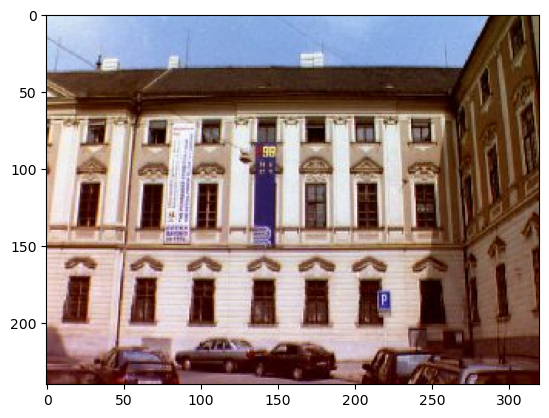

In [11]:
img_color_no_pedestrian = cv2.imread(no_pedestrian[10]) #Cargar imagen random
img_color_no_pedestrian = cv2.cvtColor(img_color_no_pedestrian, cv2.COLOR_BGR2RGB) #Esto porque OpenCV carga las imagenes en BGR en vez de RGB
plt.imshow(img_color_no_pedestrian)

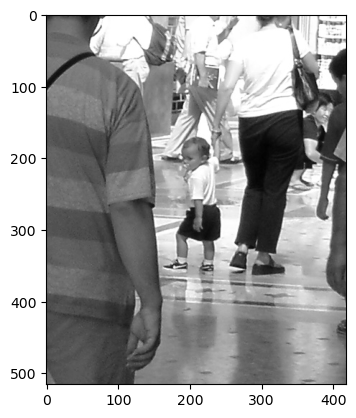

In [12]:
img_gray_pedestrian = cv2.cvtColor(img_color_pedestrian, cv2.COLOR_RGB2GRAY) #Convertir imagen de RGB a escala de grises
plt.imshow(img_gray_pedestrian, cmap = "gray")

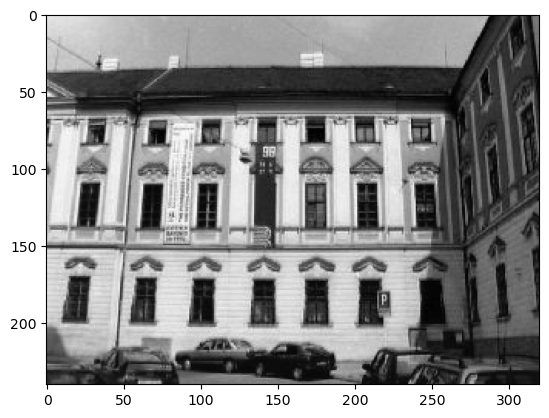

In [13]:
img_gray_no_pedestrian = cv2.cvtColor(img_color_no_pedestrian, cv2.COLOR_RGB2GRAY) #Convertir imagen de RGB a escala de grises
plt.imshow(img_gray_no_pedestrian, cmap = "gray")

In [14]:
features_pedestrian, hog_img_pedestrian = hog_funct(img_gray_pedestrian) #Aplicar funcion HOG y guardar características
                                                                        #  y laimagen en diferentes variables

In [15]:
features_pedestrian.shape

(34100,)

In [16]:
hog_img_pedestrian.shape

(516, 419)

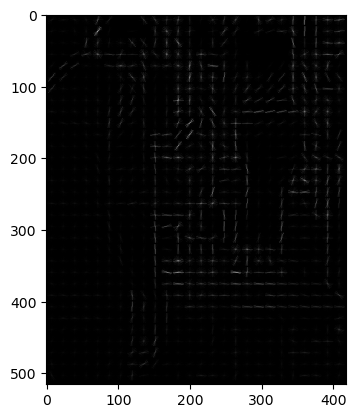

In [17]:
plt.imshow(hog_img_pedestrian, cmap = 'gray')

In [18]:
features_no_pedestrian, hog_img_no_pedestrian = hog_funct(img_gray_no_pedestrian) #Aplicar funcion HOG y guardar características
                                                                                    #  y laimagen en diferentes variables

In [19]:
features_no_pedestrian.shape

(11704,)

In [20]:
hog_img_no_pedestrian.shape

(240, 320)

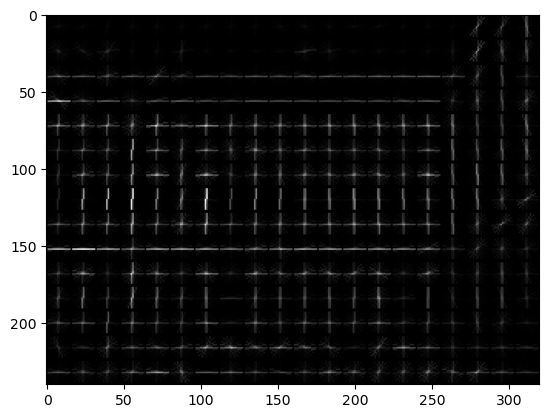

In [21]:
plt.imshow(hog_img_no_pedestrian, cmap = 'gray')

Extraer features HOG para ambos tipos de datos

In [23]:
pedestrian_hog_accum = [] #Crear lista vacía para luego agregar las características HOG

for image in pedestrian:
    img_color = mpimg.imread(image)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (64, 128))  # ancho x alto estándar para detección de peatones

    pedestrian_hog_feature, pedestrian_hog_img = hog_funct(img_gray) #Aplicar funcion HOG

    pedestrian_hog_accum.append(pedestrian_hog_feature) #Agregar características HOG a la lista

In [24]:
#Apilar verticalmente todos los vectores HOG de imágenes con peatones en una sola matriz
X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)

# Crear vector de etiquetas (1) del mismo tamaño que X_pedestrian
# Cada fila representa una imagen con peatón
y_pedestrian = np.ones(len(X_pedestrian))


In [25]:
X_pedestrian.shape

(614, 924)

In [26]:
y_pedestrian.shape

(614,)

In [27]:
no_pedestrian_hog_accum = []  #Crear lista vacía para luego agregar las características HOG

for image in no_pedestrian:
    img_color = mpimg.imread(image)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (64, 128))  # ancho x alto estándar para detección de peatones


    no_pedestrian_hog_feature, no_pedestrian_hog_img = hog_funct(img_gray)

    no_pedestrian_hog_accum.append(no_pedestrian_hog_feature)  #Agregar características HOG a la lista

In [28]:
#Apilar verticalmente todos los vectores HOG de imágenes sin peatones en una sola matriz
X_no_pedestrian = np.vstack(no_pedestrian_hog_accum).astype(np.float64)

# Crea un vector de etiquetas (0) del mismo tamaño que X_no_pedestrian
# Cada fila representa una imagen sin peatón
y_no_pedestrian = np.zeros(len(X_no_pedestrian))


In [29]:
X_no_pedestrian.shape

(1218, 924)

In [30]:
y_no_pedestrian.shape

(1218,)

Se combinan ambos datos para alimentar SVM

In [32]:
# Combinar características de imágenes con y sin peatones en una sola matriz
X = np.vstack((X_pedestrian, X_no_pedestrian))
X.shape

(1832, 924)

In [33]:
# Combina las etiquetas de peatones (1) y no peatones (0) en un solo vector
y = np.hstack((y_pedestrian, y_no_pedestrian))
y.shape

(1832,)

Se generan datos de entrenamiento y de prueba

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
X_train.shape

(1465, 924)

In [37]:
X_test.shape

(367, 924)

Se importa el clasificador y se entrena

In [39]:
from sklearn.svm import SVC

#Crear el modelo
svc_model = SVC()

# Entrena el modelo con los datos de entrenamiento (características y etiquetas)
svc_model.fit(X_train, y_train)

SVC()

In [40]:
# Usa el modelo entrenado para predecir las etiquetas de los datos de prueba
y_predict = svc_model.predict(X_test)

<Axes: >

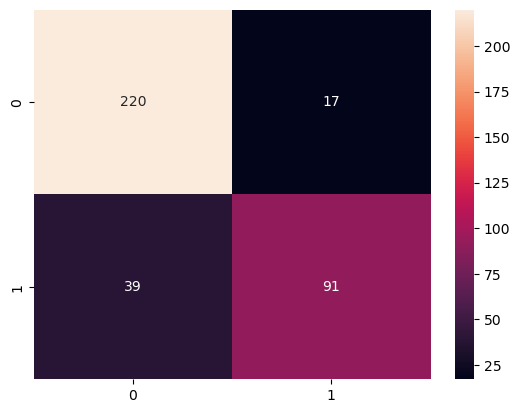

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

#Calcular y mostrar mapa de confusion
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = "d")

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       237
         1.0       0.84      0.70      0.76       130

    accuracy                           0.85       367
   macro avg       0.85      0.81      0.83       367
weighted avg       0.85      0.85      0.84       367



GridSearchCV

In [44]:
#Optimizar el modelo penalizando por error, influencia de entrenamiento y tipo de kernel
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [45]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.672 total time=   2.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   1.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   1.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   2.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   1.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.676 total time=   1.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   1.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.672 total time=   1.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [46]:
#Mejor conjunto encontrado
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [47]:
#Mejor combinacion de parametros encontrada
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [48]:
#Predecir datos de prueba utilizando los nuevos parametros encontrados
grid_predictions = grid.predict(X_test)

<Axes: >

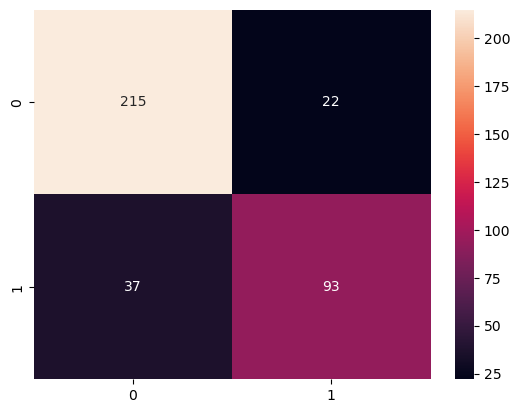

In [49]:
#Calcular y mostrar mapa de confusion
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot = True, fmt = "d")

In [53]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       237
         1.0       0.81      0.72      0.76       130

    accuracy                           0.84       367
   macro avg       0.83      0.81      0.82       367
weighted avg       0.84      0.84      0.84       367

